In [1]:
import re
import matplotlib.pyplot as plt
from matplotlib import colormaps 

In [2]:
filenames = {
    "frozen_14k": "frozen_14k.txt",
    "unfrozen_14k": "unfrozen_14k.txt"
}

metrics = {
    "frozen_14k": "CER",
    "unfrozen_14k": "WER"
}

In [9]:
filenames = {
    "weights": "weights.txt",
    "manual-weights": "manual-weights.txt",
    "manual-weights-baseline": "manual-weights-baseline.txt",
}

metrics = {
    "weights": "WER",
    "manual-weights": "WER",
    "manual-weights-baseline": "WER",
}

In [10]:
data = {}
for key, filename in filenames.items():
    with open('training_losses/' + filename, "r") as f:
        data[key] = f.read()

def get_metric(metric_name, d):
    return  [float(a[0]) for a  in re.findall(rf"{metric_name}: (\d+.\d+(e|)(\-|\+|)\d*)", d)]

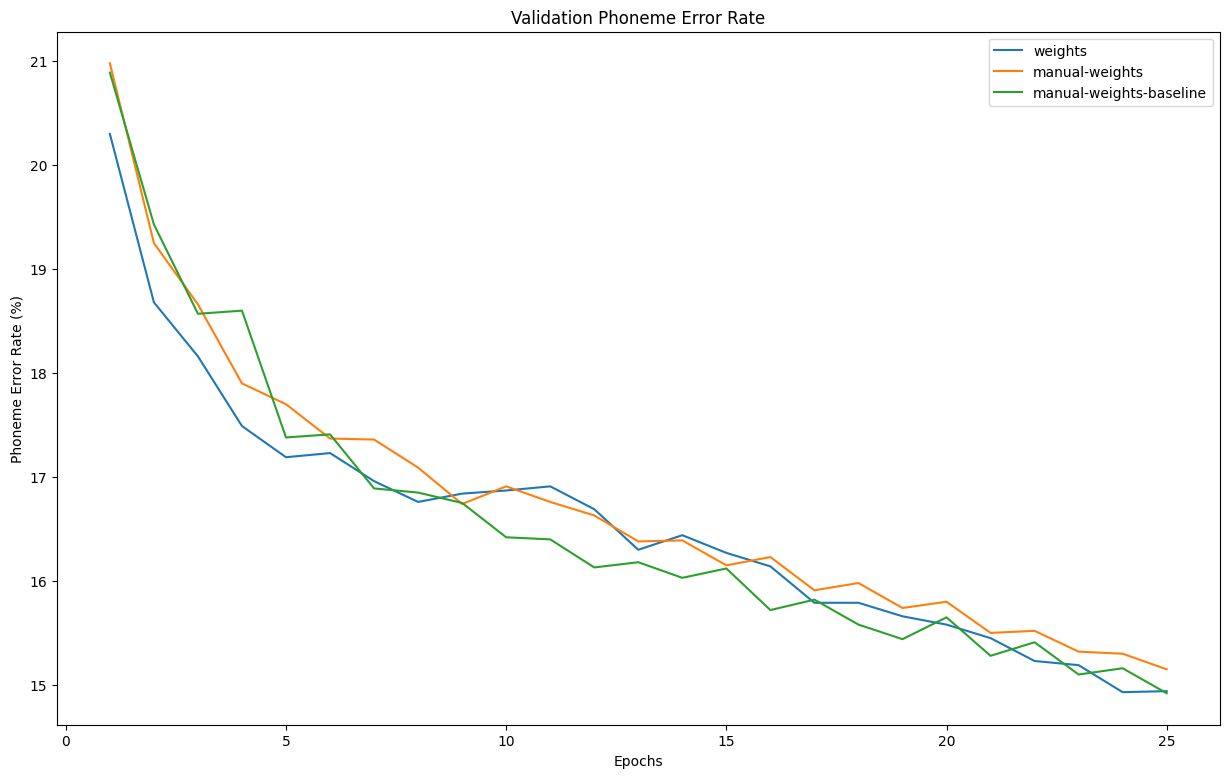

In [11]:
plt.figure(figsize=(15, 9))

plt.title("Validation Phoneme Error Rate")
plt.xlabel("Epochs")
plt.ylabel("Phoneme Error Rate (%)")

for key, d in data.items():
    per = get_metric(f"valid {metrics[key]}", d)
    plt.plot(range(1, len(per) + 1), per, label=key)
    
plt.legend()

plt.savefig("validation_per_plot.png", bbox_inches="tight")

In [12]:
with open("training_losses/unfrozen_14k.txt", "r") as f:
        temp = f.read()

train = get_metric("train loss", temp)
valid = get_metric("valid loss", temp)
print(valid, min(valid), valid.index(min(valid)))

train[5]

[0.559, 0.529, 0.517, 0.517, 0.515, 0.531, 0.518, 0.569, 0.566, 0.58, 0.622, 0.644, 0.667, 0.682, 0.704] 0.515 4


0.228

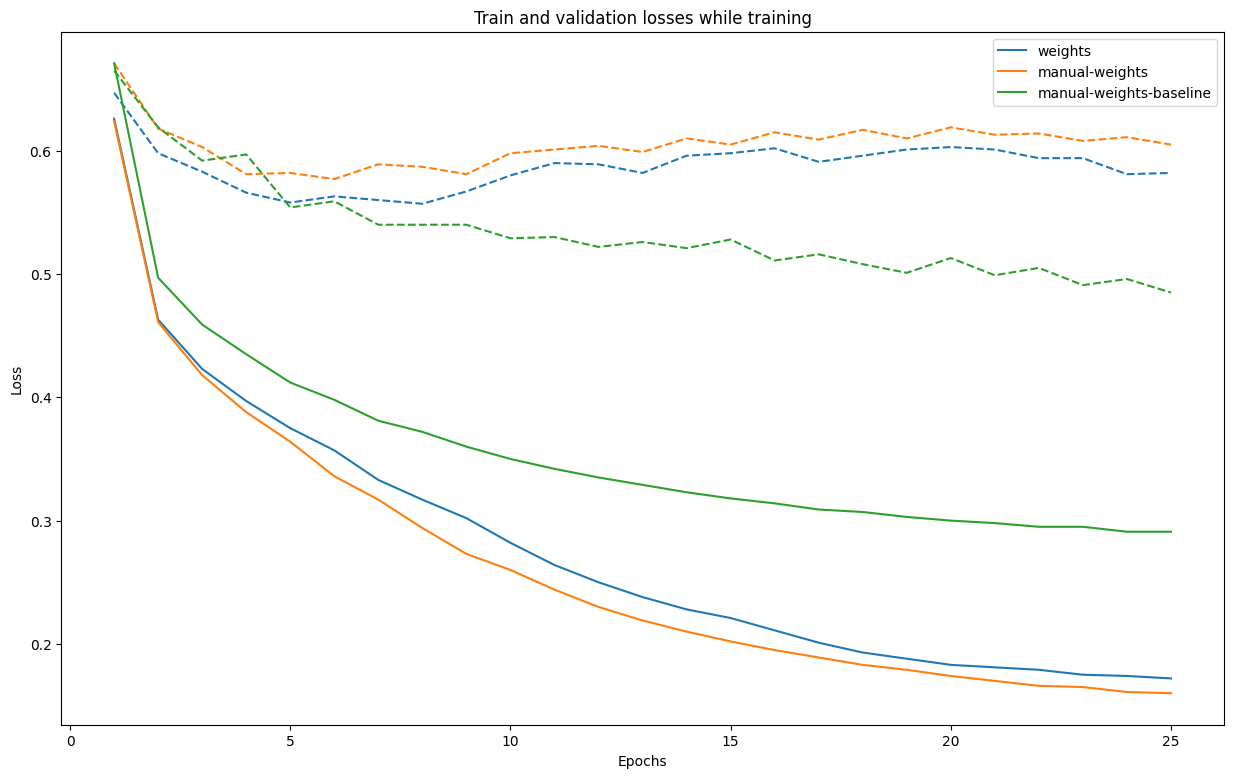

In [13]:
plt.figure(figsize=(15, 9))

plt.title("Train and validation losses while training")

for (key, d), color in zip(data.items(), colormaps.get_cmap('tab10').colors):
    train = get_metric("train loss", d)
    valid = get_metric("valid loss", d)
    plt.plot(range(1, len(train) + 1), train, label=f'{key}', color=color)
    plt.plot(range(1, len(valid) + 1), valid, linestyle='dashed', color=color)

# Adding legends for x-axis and y-axis
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Adding legend for the plot
plt.legend()

# Save the figure as SVG
plt.savefig("train_validation_losses_plot.png", bbox_inches="tight")

plt.show()

In [48]:
cmap = colormaps.get_cmap('tab10')
print(cmap.__dict__, cmap.colors)

{'monochrome': False, 'colors': ((0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)), 'name': 'tab10', 'N': 10, '_rgba_bad': (0.0, 0.0, 0.0, 0.0), '_rgba_under': None, '_rgba_over': None, '_i_under': 10, '_i_over': 11, '_i_bad': 12, '_isinit': False, 'colorbar_extend': False} ((0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.1725